   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Age count is:  1338
Age minimum observation is  18
Age maximum observation is  64
Age average value of observations is  39.20702541106129
Age median value of observations is  39.0
Age the 25th percentile observation is  27.0
Age the 75th percentile observation is  51.0
Age inter quartile length is  24.0
Age minimum acceptable observation is  -9.0
Age maximum acceptable observation is  87.0
Age cardinality is  47
Age missing percentage of observations is  0.0
Age standrad deviation of observation is  14.049960379216154


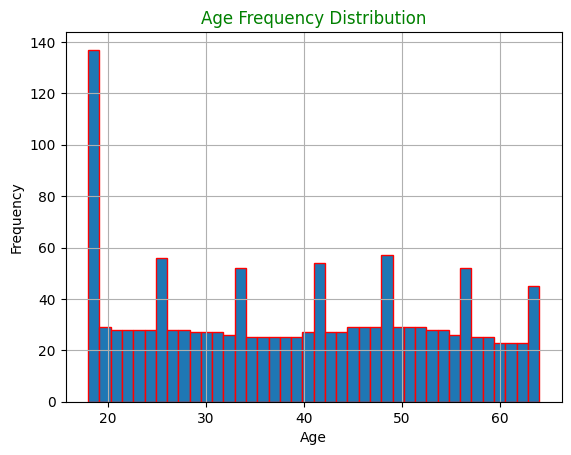

Bmi count is:  1338
Bmi minimum observation is  15.96
Bmi maximum observation is  53.13
Bmi average value of observations is  30.66339686098655
Bmi median value of observations is  30.4
Bmi the 25th percentile observation is  26.29625
Bmi the 75th percentile observation is  34.69375
Bmi inter quartile length is  8.3975
Bmi minimum acceptable observation is  13.7
Bmi maximum acceptable observation is  47.290000000000006
Bmi cardinality is  548
Bmi missing percentage of observations is  0.0
Bmi standrad deviation of observation is  6.098186911679014


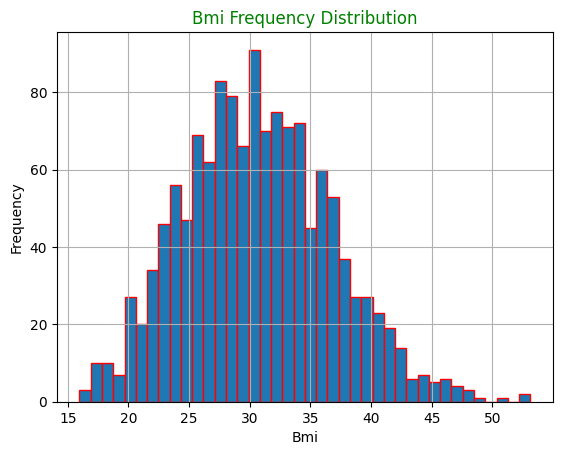

Children count is:  1338
Children minimum observation is  0
Children maximum observation is  5
Children average value of observations is  1.0949177877429
Children median value of observations is  1.0
Children the 25th percentile observation is  0.0
Children the 75th percentile observation is  2.0
Children inter quartile length is  2.0
Children minimum acceptable observation is  -3.0
Children maximum acceptable observation is  5.0
Children cardinality is  6
Children missing percentage of observations is  0.0
Children standrad deviation of observation is  1.205492739781914


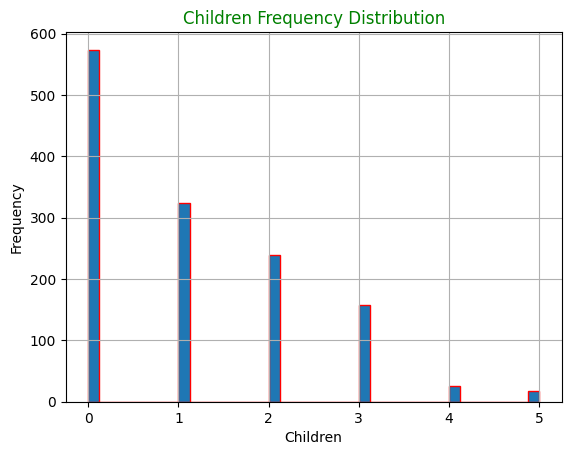

Charges count is:  1338
Charges minimum observation is  1121.8739
Charges maximum observation is  63770.42801
Charges average value of observations is  13270.422265141257
Charges median value of observations is  9382.033
Charges the 25th percentile observation is  4740.28715
Charges the 75th percentile observation is  16639.912515
Charges inter quartile length is  11899.625365
Charges minimum acceptable observation is  -13109.1508975
Charges maximum acceptable observation is  34489.350562499996
Charges cardinality is  1337
Charges missing percentage of observations is  0.0
Charges standrad deviation of observation is  12110.011236694001


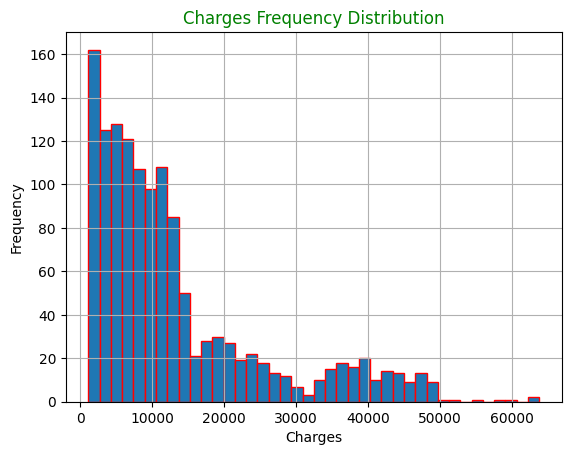

sex
male      676
female    662
Name: count, dtype: int64


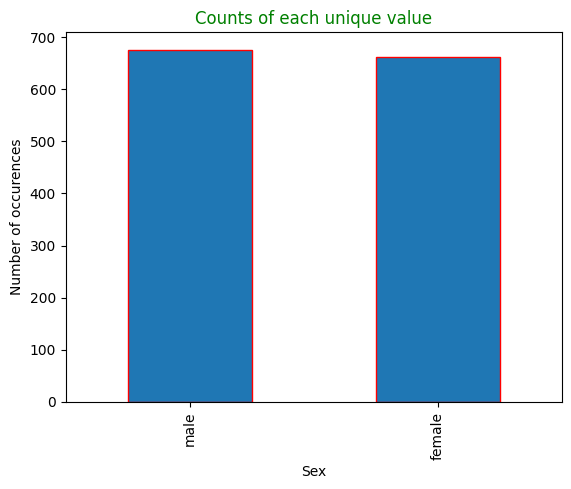

smoker
no     1064
yes     274
Name: count, dtype: int64


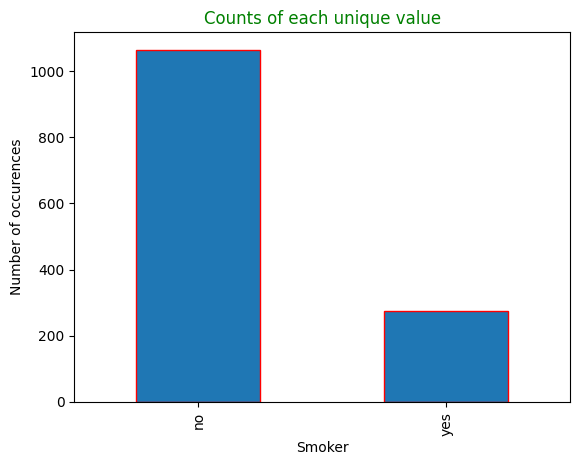

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


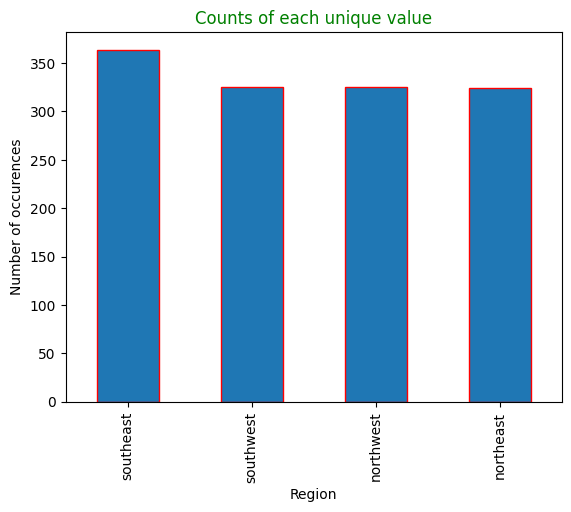

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# Load the data
df = pd.read_csv("MLAssignment.csv")

# Display the first few rows of the dataset
print(df.head())

# Display summary statistics
def stat_summary_cont(column):
  cnt = len(df[column])
  min = df[column].min()
  max = df[column].max()
  avg = df[column].mean()
  med = df[column].median()
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  min_acc = q1 - 1.5*iqr
  max_acc = q3 + 1.5*iqr
  car = df[column].nunique()
  miss_per = (df[column].isnull().sum()/cnt)
  std = df[column].std()
  df[column].hist(bins=40, edgecolor = "Red")
  plt.title(f"{column.capitalize()} Frequency Distribution", color="Green")
  plt.xlabel(column.capitalize())
  plt.ylabel("Frequency")
  print(f"{column.capitalize()} count is: ",cnt)
  print(f"{column.capitalize()} minimum observation is ",min)
  print(f"{column.capitalize()} maximum observation is ",max)
  print(f"{column.capitalize()} average value of observations is ",avg)
  print(f"{column.capitalize()} median value of observations is ",med)
  print(f"{column.capitalize()} the 25th percentile observation is ",q1)
  print(f"{column.capitalize()} the 75th percentile observation is ",q3)
  print(f"{column.capitalize()} inter quartile length is ",iqr)
  print(f"{column.capitalize()} minimum acceptable observation is ",min_acc)
  print(f"{column.capitalize()} maximum acceptable observation is ",max_acc)
  print(f"{column.capitalize()} cardinality is ",car)
  print(f"{column.capitalize()} missing percentage of observations is ",miss_per)
  print(f"{column.capitalize()} standrad deviation of observation is ",std)
  plt.show()

for column in ['age', 'bmi', 'children', 'charges']:
    stat_summary_cont(column)

def stat_summary_cat(column):
  val_counts = df[column].value_counts()
  print(val_counts)
  val_counts.plot(kind = "bar", edgecolor = "red")
  plt.title("Counts of each unique value", color = "green")
  plt.xlabel(f"{column.capitalize()}")
  plt.ylabel("Number of occurences")
  plt.show()

for column in ['sex', 'smoker', 'region']:
    stat_summary_cat(column)

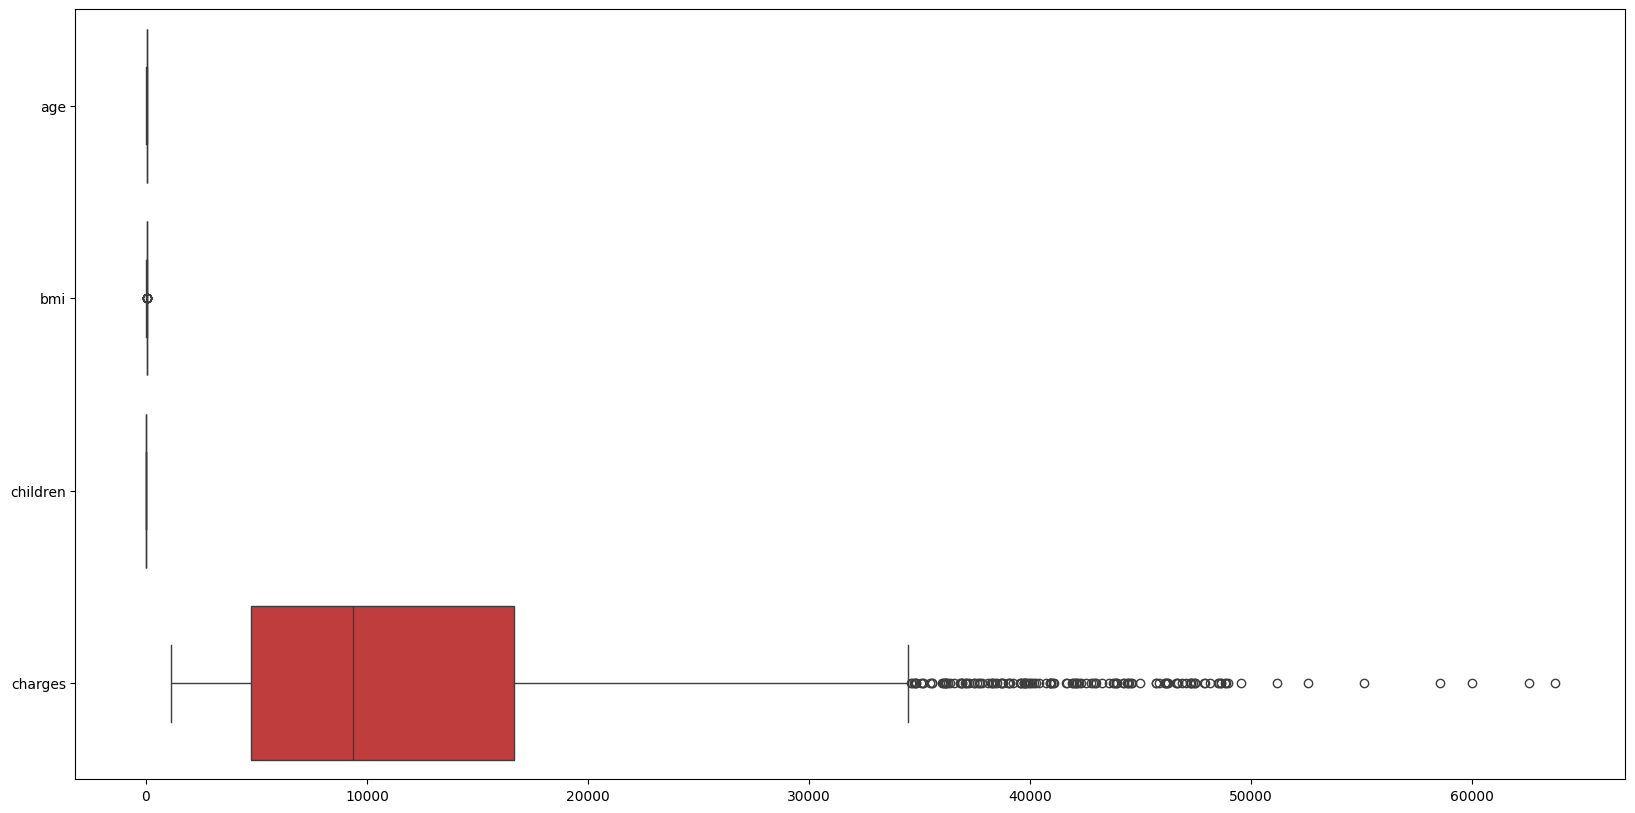

In [41]:
# Plot boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient="h")
plt.show()

In [42]:
# Handling missing values (there are none in this dataset)
# Handle outliers

# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    min_acc_val = Q1 - 1.5 * IQR
    max_acc_val = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=min_acc_val, upper=max_acc_val)
    return df

# Remove outliers from the specified columns
for column in ['age', 'bmi', 'children', 'charges']:
    df = remove_outliers(df, column)

# Display summary statistics after removing outliers
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.650034     1.094918  12479.369251
std      14.049960     6.056926     1.205493  10158.056096
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    47.290000     5.000000  34489.350562


In [43]:
#Dummy Variables

# Create dummy variables
sex_dummies = pd.get_dummies(df['sex'], prefix='sex').astype(int)
smoker_dummies = pd.get_dummies(df['smoker'], prefix='smoker').astype(int)
region_dummies = pd.get_dummies(df['region'], prefix='region').astype(int)

# Concatenate the original DataFrame with the dummy variables
df = pd.concat([df, sex_dummies, smoker_dummies, region_dummies], axis=1)

# Drop the original categorical columns
df = df.drop(columns=['sex', 'smoker', 'region'])

# Normalization

scaler = StandardScaler()
numerical_features = ['age', 'bmi', 'children']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the transformed DataFrame
print(df)

           age       bmi  children      charges  sex_female  sex_male  \
0    -1.438764 -0.454201 -0.908614  16884.92400           1         0   
1    -1.509965  0.515300 -0.078767   1725.55230           0         1   
2    -0.797954  0.388125  1.580926   4449.46200           0         1   
3    -0.441948 -1.312218 -0.908614  21984.47061           0         1   
4    -0.513149 -0.292342 -0.908614   3866.85520           0         1   
...        ...       ...       ...          ...         ...       ...   
1333  0.768473  0.052846  1.580926  10600.54830           0         1   
1334 -1.509965  0.209750 -0.908614   2205.98080           1         0   
1335 -1.509965  1.023999 -0.908614   1629.83350           1         0   
1336 -1.296362 -0.801041 -0.908614   2007.94500           1         0   
1337  1.551686 -0.260961 -0.908614  29141.36030           1         0   

      smoker_no  smoker_yes  region_northeast  region_northwest  \
0             0           1                 0           

In [44]:
# Split the data into training and testing sets
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    ei = y_test - y_pred_test
    ei2 = ei**2
    MSE = ei2.mean()
    RMSE = MSE**0.5
    ei_abs = ei.abs()
    MAE = ei_abs.mean()
    SSE = ei2.sum()
    SST = ((y_pred_test - y_pred_test.mean())**2).sum()
    r2 = 1-SSE/SST
    print("Summation of Error is ",ei.sum())
    print("Mean Square Error is ",MSE)
    print("RMSE is ",RMSE)
    print("Mean Absolute Error is ",MAE)
    print("R 2 value is ",r2)

Summation of Error is  -71149.52517281321
Mean Square Error is  23437328.29163491
RMSE is  4841.2114487631
Mean Absolute Error is  3316.7325303695925
R 2 value is  0.7096317259853583
Summation of Error is  -100190.25572849956
Mean Square Error is  28993970.45273953
RMSE is  5384.604948623392
Mean Absolute Error is  2300.5693336324643
R 2 value is  0.7339643442797004
Summation of Error is  15750.821565499973
Mean Square Error is  27989408.02959785
RMSE is  5290.501680332201
Mean Absolute Error is  3294.1371031772383
R 2 value is  0.6377146567378225


In [45]:
# Multiple Linear Regression

df = pd.read_csv("MLAssignment.csv")

X_total = df.drop(columns="charges")
y_total = df[["sex", "smoker", "region", "charges"]]

X_train, X_test, y_train, y_test = train_test_split(X_total, y_total, test_size=0.3, random_state=42)

X_train_male_yes_northeast = X_train[(X_train['sex']=='male') & (X_train['smoker']=='yes') & (X_train['region']=='northeast')]
X_train_male_yes_northwest = X_train[(X_train['sex']=='male') & (X_train['smoker']=='yes') & (X_train['region']=='northwest')]
X_train_male_yes_southeast = X_train[(X_train['sex']=='male') & (X_train['smoker']=='yes') & (X_train['region']=='southeast')]
X_train_male_yes_southwest = X_train[(X_train['sex']=='male') & (X_train['smoker']=='yes') & (X_train['region']=='southwest')]

X_train_male_no_northeast = X_train[(X_train['sex']=='male') & (X_train['smoker']=='no') & (X_train['region']=='northeast')]
X_train_male_no_northwest = X_train[(X_train['sex']=='male') & (X_train['smoker']=='no') & (X_train['region']=='northwest')]
X_train_male_no_southeast = X_train[(X_train['sex']=='male') & (X_train['smoker']=='no') & (X_train['region']=='southeast')]
X_train_male_no_southwest = X_train[(X_train['sex']=='male') & (X_train['smoker']=='no') & (X_train['region']=='southwest')]

X_train_female_yes_northeast = X_train[(X_train['sex']=='female') & (X_train['smoker']=='yes') & (X_train['region']=='northeast')]
X_train_female_yes_northwest = X_train[(X_train['sex']=='female') & (X_train['smoker']=='yes') & (X_train['region']=='northwest')]
X_train_female_yes_southeast = X_train[(X_train['sex']=='female') & (X_train['smoker']=='yes') & (X_train['region']=='southeast')]
X_train_female_yes_southwest = X_train[(X_train['sex']=='female') & (X_train['smoker']=='yes') & (X_train['region']=='southwest')]

X_train_female_no_northeast = X_train[(X_train['sex']=='female') & (X_train['smoker']=='no') & (X_train['region']=='northeast')]
X_train_female_no_northwest = X_train[(X_train['sex']=='female') & (X_train['smoker']=='no') & (X_train['region']=='northwest')]
X_train_female_no_southeast = X_train[(X_train['sex']=='female') & (X_train['smoker']=='no') & (X_train['region']=='southeast')]
X_train_female_no_southwest = X_train[(X_train['sex']=='female') & (X_train['smoker']=='no') & (X_train['region']=='southwest')]

y_train_male_yes_northeast = y_train[(y_train['sex']=='male') & (y_train['smoker']=='yes') & (y_train['region']=='northeast')]
y_train_male_yes_northwest = y_train[(y_train['sex']=='male') & (y_train['smoker']=='yes') & (y_train['region']=='northwest')]
y_train_male_yes_southeast = y_train[(y_train['sex']=='male') & (y_train['smoker']=='yes') & (y_train['region']=='southeast')]
y_train_male_yes_southwest = y_train[(y_train['sex']=='male') & (y_train['smoker']=='yes') & (y_train['region']=='southwest')]

y_train_male_no_northeast = y_train[(y_train['sex']=='male') & (y_train['smoker']=='no') & (y_train['region']=='northeast')]
y_train_male_no_northwest = y_train[(y_train['sex']=='male') & (y_train['smoker']=='no') & (y_train['region']=='northwest')]
y_train_male_no_southeast = y_train[(y_train['sex']=='male') & (y_train['smoker']=='no') & (y_train['region']=='southeast')]
y_train_male_no_southwest = y_train[(y_train['sex']=='male') & (y_train['smoker']=='no') & (y_train['region']=='southwest')]

y_train_female_yes_northeast = y_train[(y_train['sex']=='female') & (y_train['smoker']=='yes') & (y_train['region']=='northeast')]
y_train_female_yes_northwest = y_train[(y_train['sex']=='female') & (y_train['smoker']=='yes') & (y_train['region']=='northwest')]
y_train_female_yes_southeast = y_train[(y_train['sex']=='female') & (y_train['smoker']=='yes') & (y_train['region']=='southeast')]
y_train_female_yes_southwest = y_train[(y_train['sex']=='female') & (y_train['smoker']=='yes') & (y_train['region']=='southwest')]

y_train_female_no_northeast = y_train[(y_train['sex']=='female') & (y_train['smoker']=='no') & (y_train['region']=='northeast')]
y_train_female_no_northwest = y_train[(y_train['sex']=='female') & (y_train['smoker']=='no') & (y_train['region']=='northwest')]
y_train_female_no_southeast = y_train[(y_train['sex']=='female') & (y_train['smoker']=='no') & (y_train['region']=='southeast')]
y_train_female_no_southwest = y_train[(y_train['sex']=='female') & (y_train['smoker']=='no') & (y_train['region']=='southwest')]

X_train_male_yes_northeast = X_train_male_yes_northeast.drop(columns = ['sex','smoker','region'])
X_train_male_yes_northwest = X_train_male_yes_northwest.drop(columns = ['sex','smoker','region'])
X_train_male_yes_southeast = X_train_male_yes_southeast.drop(columns = ['sex','smoker','region'])
X_train_male_yes_southwest = X_train_male_yes_southwest.drop(columns = ['sex','smoker','region'])
X_train_male_no_northeast = X_train_male_no_northeast.drop(columns = ['sex','smoker','region'])
X_train_male_no_northwest = X_train_male_no_northwest.drop(columns = ['sex','smoker','region'])
X_train_male_no_southeast = X_train_male_no_southeast.drop(columns = ['sex','smoker','region'])
X_train_male_no_southwest = X_train_male_no_southwest.drop(columns = ['sex','smoker','region'])
X_train_female_yes_northeast = X_train_female_yes_northeast.drop(columns = ['sex','smoker','region'])
X_train_female_yes_northwest = X_train_female_yes_northwest.drop(columns = ['sex','smoker','region'])
X_train_female_yes_southeast = X_train_female_yes_southeast.drop(columns = ['sex','smoker','region'])
X_train_female_yes_southwest = X_train_female_yes_southwest.drop(columns = ['sex','smoker','region'])
X_train_female_no_northeast = X_train_female_no_northeast.drop(columns = ['sex','smoker','region'])
X_train_female_no_northwest = X_train_female_no_northwest.drop(columns = ['sex','smoker','region'])
X_train_female_no_southeast = X_train_female_no_southeast.drop(columns = ['sex','smoker','region'])
X_train_female_no_southwest = X_train_female_no_southwest.drop(columns = ['sex','smoker','region'])

y_train_male_yes_northeast = y_train_male_yes_northeast.drop(columns = ['sex','smoker','region'])
y_train_male_yes_northwest = y_train_male_yes_northwest.drop(columns = ['sex','smoker','region'])
y_train_male_yes_southeast = y_train_male_yes_southeast.drop(columns = ['sex','smoker','region'])
y_train_male_yes_southwest = y_train_male_yes_southwest.drop(columns = ['sex','smoker','region'])
y_train_male_no_northeast = y_train_male_no_northeast.drop(columns = ['sex','smoker','region'])
y_train_male_no_northwest = y_train_male_no_northwest.drop(columns = ['sex','smoker','region'])
y_train_male_no_southeast = y_train_male_no_southeast.drop(columns = ['sex','smoker','region'])
y_train_male_no_southwest = y_train_male_no_southwest.drop(columns = ['sex','smoker','region'])
y_train_female_yes_northeast = y_train_female_yes_northeast.drop(columns = ['sex','smoker','region'])
y_train_female_yes_northwest = y_train_female_yes_northwest.drop(columns = ['sex','smoker','region'])
y_train_female_yes_southeast = y_train_female_yes_southeast.drop(columns = ['sex','smoker','region'])
y_train_female_yes_southwest = y_train_female_yes_southwest.drop(columns = ['sex','smoker','region'])
y_train_female_no_northeast = y_train_female_no_northeast.drop(columns = ['sex','smoker','region'])
y_train_female_no_northwest = y_train_female_no_northwest.drop(columns = ['sex','smoker','region'])
y_train_female_no_southeast = y_train_female_no_southeast.drop(columns = ['sex','smoker','region'])
y_train_female_no_southwest = y_train_female_no_southwest.drop(columns = ['sex','smoker','region'])

y_train = y_train['charges']
y_test = y_test['charges']

model_male_yes_northeast = LinearRegression()
model_male_yes_northwest = LinearRegression()
model_male_yes_southeast = LinearRegression()
model_male_yes_southwest = LinearRegression()
model_male_no_northeast = LinearRegression()
model_male_no_northwest = LinearRegression()
model_male_no_southeast = LinearRegression()
model_male_no_southwest = LinearRegression()
model_female_yes_northeast = LinearRegression()
model_female_yes_northwest = LinearRegression()
model_female_yes_southeast = LinearRegression()
model_female_yes_southwest = LinearRegression()
model_female_no_northeast = LinearRegression()
model_female_no_northwest = LinearRegression()
model_female_no_southeast = LinearRegression()
model_female_no_southwest = LinearRegression()

model_male_yes_northeast = model_male_yes_northeast.fit(X_train_male_yes_northeast,y_train_male_yes_northeast)
model_male_yes_northwest = model_male_yes_northwest.fit(X_train_male_yes_northwest,y_train_male_yes_northwest)
model_male_yes_southeast = model_male_yes_southeast.fit(X_train_male_yes_southeast,y_train_male_yes_southeast)
model_male_yes_southwest = model_male_yes_southwest.fit(X_train_male_yes_southwest,y_train_male_yes_southwest)
model_male_no_northeast = model_male_no_northeast.fit(X_train_male_no_northeast,y_train_male_no_northeast)
model_male_no_northwest = model_male_no_northwest.fit(X_train_male_no_northwest,y_train_male_no_northwest)
model_male_no_southeast = model_male_no_southeast.fit(X_train_male_no_southeast,y_train_male_no_southeast)
model_male_no_southwest = model_male_no_southwest.fit(X_train_male_no_southwest,y_train_male_no_southwest)
model_female_yes_northeast = model_female_yes_northeast.fit(X_train_female_yes_northeast, y_train_female_yes_northeast)
model_female_yes_northwest = model_female_yes_northwest.fit(X_train_female_yes_northwest, y_train_female_yes_northwest)
model_female_yes_southeast = model_female_yes_southeast.fit(X_train_female_yes_southeast, y_train_female_yes_southeast)
model_female_yes_southwest = model_female_yes_southwest.fit(X_train_female_yes_southwest, y_train_female_yes_southwest)
model_female_no_northeast = model_female_no_northeast.fit(X_train_female_no_northeast, y_train_female_no_northeast)
model_female_no_northwest = model_female_no_northwest.fit(X_train_female_no_northwest, y_train_female_no_northwest)
model_female_no_southeast = model_female_no_southeast.fit(X_train_female_no_southeast, y_train_female_no_southeast)
model_female_no_southwest = model_female_no_southwest.fit(X_train_female_no_southwest, y_train_female_no_southwest)

import warnings

# Ignore specific warnings
warnings.simplefilter(action='ignore', category=UserWarning)

y_test_hat = []

for index, row in X_test.iterrows():
    # Reshape the row into the correct format for prediction
    row_values = row.drop(['sex', 'smoker', 'region']).values.reshape(1, -1)

    if row['sex'] == "male" and row['smoker'] == 'yes' and row['region'] == 'northeast':
        temp_value = model_male_yes_northeast.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'yes' and row['region'] == 'northwest':
        temp_value = model_male_yes_northwest.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'yes' and row['region'] == 'southeast':
        temp_value = model_male_yes_southeast.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'yes' and row['region'] == 'southwest':
        temp_value = model_male_yes_southwest.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'no' and row['region'] == 'northeast':
        temp_value = model_male_no_northeast.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'no' and row['region'] == 'northwest':
        temp_value = model_male_no_northwest.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'no' and row['region'] == 'southeast':
        temp_value = model_male_no_southeast.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'no' and row['region'] == 'southwest':
        temp_value = model_male_no_southwest.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'yes' and row['region'] == 'northeast':
        temp_value = model_female_yes_northeast.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'yes' and row['region'] == 'northwest':
        temp_value = model_female_yes_northwest.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'yes' and row['region'] == 'southeast':
        temp_value = model_female_yes_southeast.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'yes' and row['region'] == 'southwest':
        temp_value = model_female_yes_southwest.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'no' and row['region'] == 'northeast':
        temp_value = model_female_no_northeast.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'no' and row['region'] == 'northwest':
        temp_value = model_female_no_northwest.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'no' and row['region'] == 'southeast':
        temp_value = model_female_no_southeast.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'no' and row['region'] == 'southwest':
        temp_value = model_female_no_southwest.predict(row_values)

    y_test_hat.append(temp_value[0][0])

y_train_hat = []

for index, row in X_train.iterrows():
    # Reshape the row into the correct format for prediction
    row_values = row.drop(['sex', 'smoker', 'region']).values.reshape(1, -1)

    if row['sex'] == "male" and row['smoker'] == 'yes' and row['region'] == 'northeast':
        temp_value = model_male_yes_northeast.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'yes' and row['region'] == 'northwest':
        temp_value = model_male_yes_northwest.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'yes' and row['region'] == 'southeast':
        temp_value = model_male_yes_southeast.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'yes' and row['region'] == 'southwest':
        temp_value = model_male_yes_southwest.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'no' and row['region'] == 'northeast':
        temp_value = model_male_no_northeast.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'no' and row['region'] == 'northwest':
        temp_value = model_male_no_northwest.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'no' and row['region'] == 'southeast':
        temp_value = model_male_no_southeast.predict(row_values)
    elif row['sex'] == "male" and row['smoker'] == 'no' and row['region'] == 'southwest':
        temp_value = model_male_no_southwest.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'yes' and row['region'] == 'northeast':
        temp_value = model_female_yes_northeast.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'yes' and row['region'] == 'northwest':
        temp_value = model_female_yes_northwest.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'yes' and row['region'] == 'southeast':
        temp_value = model_female_yes_southeast.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'yes' and row['region'] == 'southwest':
        temp_value = model_female_yes_southwest.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'no' and row['region'] == 'northeast':
        temp_value = model_female_no_northeast.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'no' and row['region'] == 'northwest':
        temp_value = model_female_no_northwest.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'no' and row['region'] == 'southeast':
        temp_value = model_female_no_southeast.predict(row_values)
    elif row['sex'] == "female" and row['smoker'] == 'no' and row['region'] == 'southwest':
        temp_value = model_female_no_southwest.predict(row_values)

    y_train_hat.append(temp_value[0][0])

def evaluation_function(y, yhat):
    ei = y - yhat

    ei2 = ei ** 2

    MSE = ei2.mean()
    RMSE = MSE ** 0.5

    ei_abs = ei.abs()
    MAE = ei_abs.mean()

    SSR = ((yhat - y.mean())**2).sum()
    SSE = ei2.sum()
    SST = ((y - y.mean())**2).sum()
    R2 = 1 - (SSE/SST)

    print("MSE: ", MSE)
    print("RMSE: ", RMSE)
    print("MAE: ", MAE)
    print("R^2: ", R2)

print("Evaluation for the testing data: ")
evaluation_function(y_test, y_test_hat)

print("Evaluation for the training data: ")
evaluation_function(y_train, y_train_hat)

Evaluation for the testing data: 
MSE:  23296700.814558942
RMSE:  4826.665600034763
MAE:  2876.089017073912
R^2:  0.8411129699491511
Evaluation for the training data: 
MSE:  22728811.59535842
RMSE:  4767.4743413424285
MAE:  2957.512001471224
R^2:  0.8448210492145269
